<h3>ФБ-21 Князян Кирило</h3>
<h1><center><b> Лабораторна робота №4 рівень 2 </b></center></h1>
<h2><center> Структури для роботи з великими обсягами даних в Python </center></h2>

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit
import urllib.request
import zipfile
import numpy as np
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
print("Setup Complete")

Setup Complete


In [139]:
folder = 'lab4_data'
if not os.path.exists(folder):
    os.makedirs(folder)
def download_and_unzip(url, folder, check_file=None):
    if check_file and os.path.exists(check_file):
        return
    file_name = url.split('/')[-1]
    urllib.request.urlretrieve(url, file_name)
    with zipfile.ZipFile(file_name, 'r') as zip:
        zip.extractall(folder)
    os.remove(file_name)
    return

url = 'https://archive.ics.uci.edu/static/public/381/beijing+pm2+5+data.zip'
file = 'lab4_data/PRSA_data_2010.1.1-2014.12.31.csv'
download_and_unzip(url, folder, file)

<h3><center> Pandas dataframe: </center></h3>

In [140]:
start_time = timeit.default_timer()
df = pd.read_csv(file)
end_time = timeit.default_timer()
total1 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
print(f"Кількість рядків: {len(df)}")
pd.concat([df.head(), df.tail()])

Час виконання: 0.04183840000041528 секунд
Кількість рядків: 43824


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


1. Поборотися із зниклими даними.

In [141]:
start_time = timeit.default_timer()
df.dropna(inplace=True)
end_time = timeit.default_timer()
total2 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
pd.concat([df.head(), df.tail()])

Час виконання: 0.009531200004857965 секунд


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

Час виконання: 0.014345600000524428 секунд


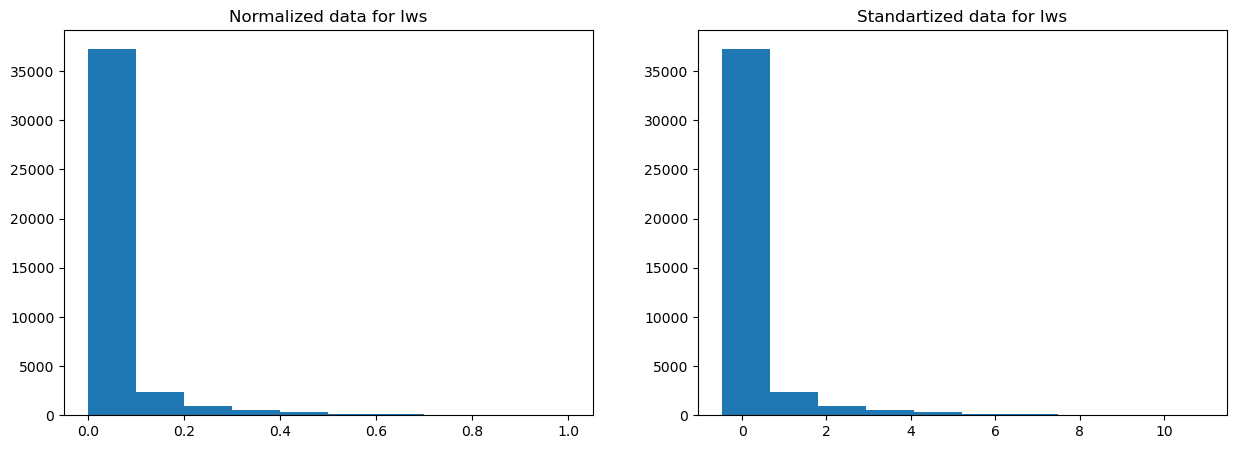

In [142]:
start_time = timeit.default_timer()
def normalize(data):
    norm_data = (data-min(data))/(max(data)-min(data))
    return norm_data
def standartize(data):
    standart_data = (data - data.mean())/data.std()
    return standart_data
column = "Iws"
normalized = normalize(df[column])
standartized = standartize(df[column])
end_time = timeit.default_timer()
total3 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title(f'Normalized data for {column}')
plt.hist(normalized)
plt.subplot(1, 2, 2)
plt.title(f'Standartized data for {column}')
plt.hist(standartized)
plt.show()

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

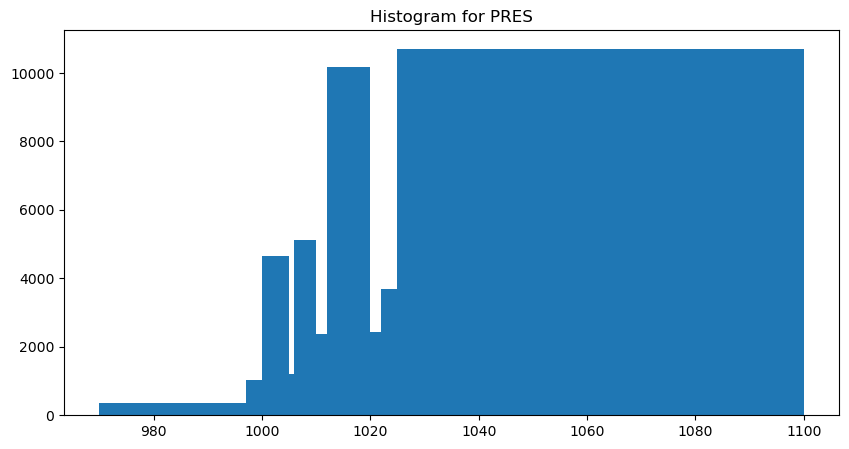

In [143]:
plt.figure(figsize=(10, 5))
plt.title(f'Histogram for PRES')
plt.hist(df["PRES"], bins=[970, 997, 1000, 1005, 1006, 1010, 1012, 1020, 1022, 1025, 1100])
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


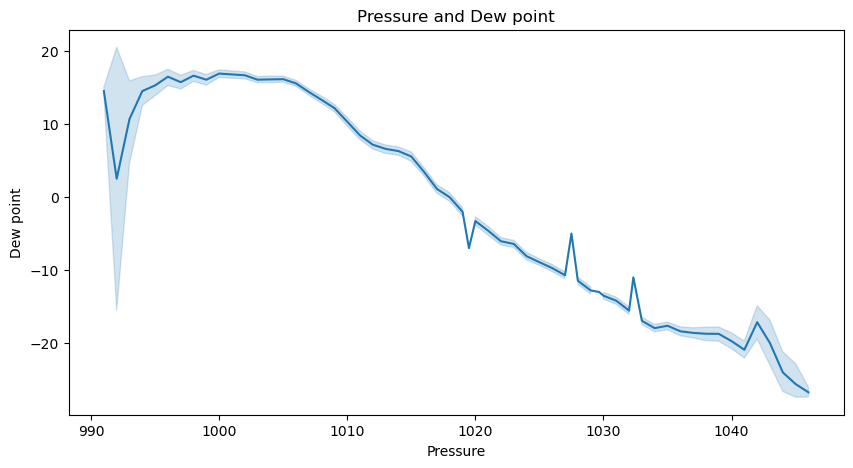

In [144]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x='PRES', y='DEWP')
plt.title('Pressure and Dew point')
plt.xlabel('Pressure')
plt.ylabel('Dew point')
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [145]:
pearson = stats.pearsonr(df["PRES"], df["DEWP"]).statistic
spearman = stats.spearmanr(df["PRES"], df["DEWP"]).statistic
print(f"Коефіцієнт Пірсона: {pearson}, Спірмена: {spearman}")

Коефіцієнт Пірсона: -0.7777221206444005, Спірмена: -0.784039062659944


6. Провести One Hot Encoding категоріального string атрибуту.

In [146]:
start_time = timeit.default_timer()
df_copy = df.copy()
enc = OneHotEncoder()
encoded = enc.fit_transform(df_copy[['cbwd']]).toarray()
columns = enc.categories_[0]
for i, col in enumerate(columns):
    df_copy[col] = encoded[:, i]
end_time = timeit.default_timer()
total4 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
print(df_copy[['cbwd'] + list(columns)])

Час виконання: 0.015605900000082329 секунд
      cbwd   NE   NW   SE   cv
24      SE  0.0  0.0  1.0  0.0
25      SE  0.0  0.0  1.0  0.0
26      SE  0.0  0.0  1.0  0.0
27      SE  0.0  0.0  1.0  0.0
28      SE  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...
43819   NW  0.0  1.0  0.0  0.0
43820   NW  0.0  1.0  0.0  0.0
43821   NW  0.0  1.0  0.0  0.0
43822   NW  0.0  1.0  0.0  0.0
43823   NW  0.0  1.0  0.0  0.0

[41757 rows x 5 columns]


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

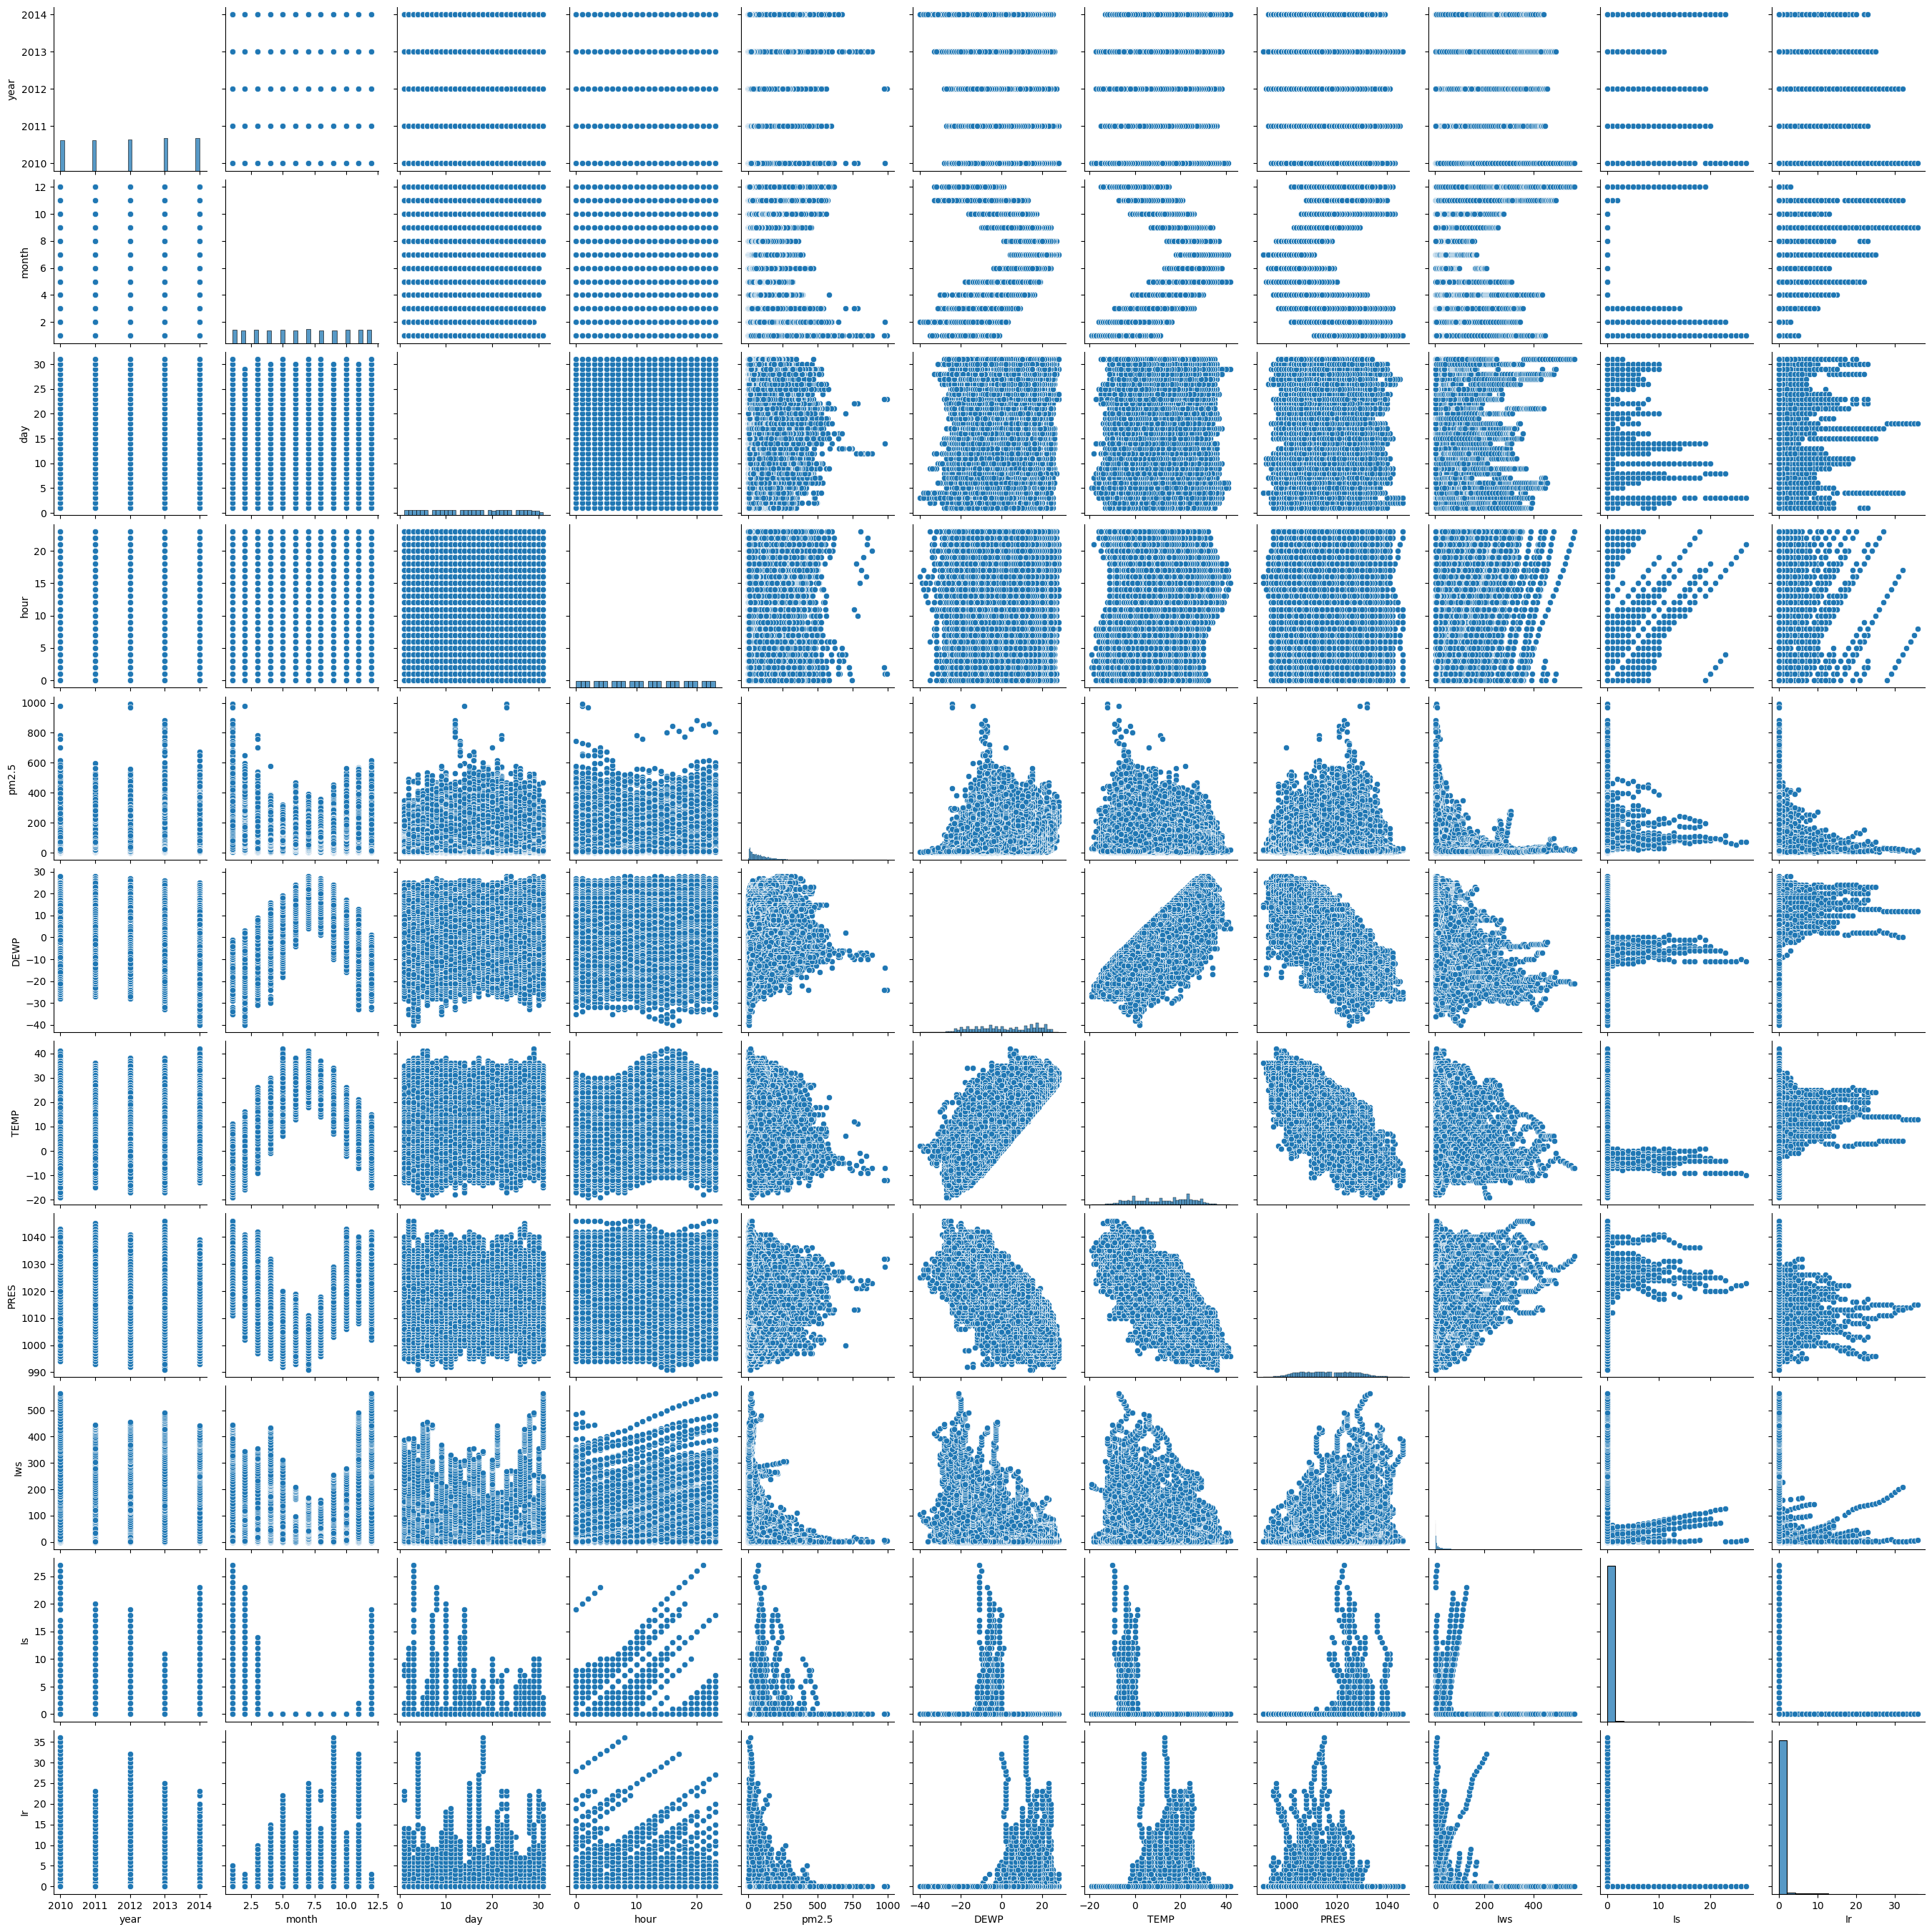

In [147]:
sns.pairplot(df[df.columns[1:]])
plt.show()

<h3><center> Numpy array: </center></h3>

In [148]:
start_time = timeit.default_timer()
data = np.genfromtxt(file, delimiter=',', skip_header=1, dtype=str)
end_time = timeit.default_timer()
total_1 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
print(f"Кількість рядків: {len(data)}")
print(data[:5])

Час виконання: 1.07432510000217 секунд
Кількість рядків: 43824
[['1' '2010' '1' '1' '0' 'NA' '-21' '-11' '1021' 'NW' '1.79' '0' '0']
 ['2' '2010' '1' '1' '1' 'NA' '-21' '-12' '1020' 'NW' '4.92' '0' '0']
 ['3' '2010' '1' '1' '2' 'NA' '-21' '-11' '1019' 'NW' '6.71' '0' '0']
 ['4' '2010' '1' '1' '3' 'NA' '-21' '-14' '1019' 'NW' '9.84' '0' '0']
 ['5' '2010' '1' '1' '4' 'NA' '-20' '-12' '1018' 'NW' '12.97' '0' '0']]


1. Поборотися із зниклими даними.

In [149]:
start_time = timeit.default_timer()
data = data[~np.any(data == 'NA', axis=1)]
float_data1 = data[:,7:9].astype(float)
float_data2 = data[:,10].astype(float).reshape(-1, 1)
int_data1 = data[:,:7].astype(int)
int_data2 = data[:,11:].astype(int)
data = np.hstack([int_data1, float_data1, data[:,9].reshape(-1, 1), float_data2, int_data2], dtype=object)
end_time = timeit.default_timer()
total_2 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
print(np.concatenate((data[:5], data[-5:])))

Час виконання: 0.20662240000092424 секунд
[[25 2010 1 2 0 129 -16 -4.0 1020.0 'SE' 1.79 0 0]
 [26 2010 1 2 1 148 -15 -4.0 1020.0 'SE' 2.68 0 0]
 [27 2010 1 2 2 159 -11 -5.0 1021.0 'SE' 3.57 0 0]
 [28 2010 1 2 3 181 -7 -5.0 1022.0 'SE' 5.36 1 0]
 [29 2010 1 2 4 138 -7 -5.0 1022.0 'SE' 6.25 2 0]
 [43820 2014 12 31 19 8 -23 -2.0 1034.0 'NW' 231.97 0 0]
 [43821 2014 12 31 20 10 -22 -3.0 1034.0 'NW' 237.78 0 0]
 [43822 2014 12 31 21 10 -22 -3.0 1034.0 'NW' 242.7 0 0]
 [43823 2014 12 31 22 8 -22 -4.0 1034.0 'NW' 246.72 0 0]
 [43824 2014 12 31 23 12 -21 -3.0 1034.0 'NW' 249.85 0 0]]


2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

Час виконання: 0.020845799997914582 секунд


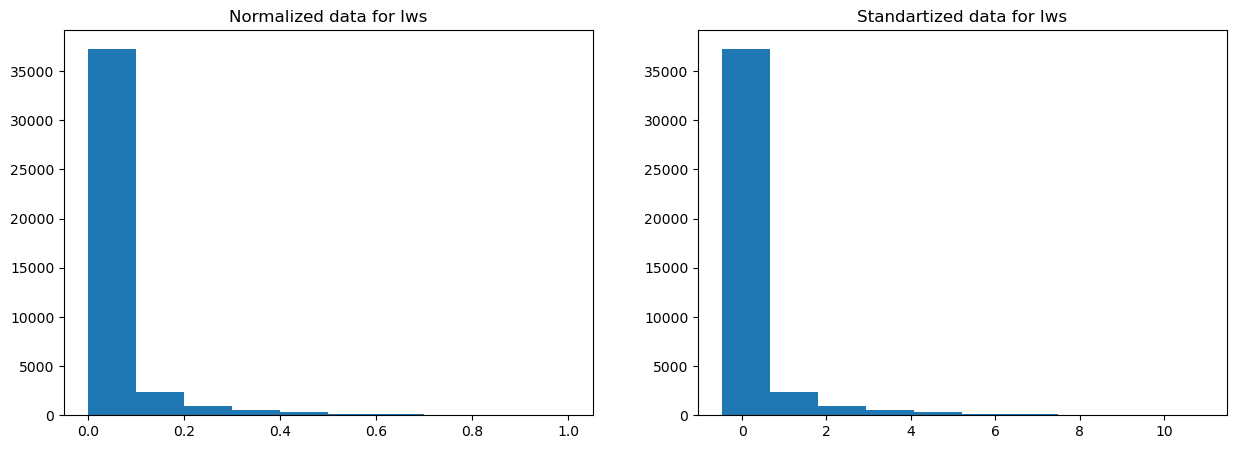

In [150]:
start_time = timeit.default_timer()
def normalizen(data):
    norm_data = (data-min(data))/(max(data)-min(data))
    return norm_data
def standartizen(data):
    standart_data = (data - np.mean(data))/np.std(data)
    return standart_data
data_to_use = data[:,10]
normalizedn = normalizen(data_to_use)
standartizedn = standartizen(data_to_use)
end_time = timeit.default_timer()
total_3 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title(f'Normalized data for Iws')
plt.hist(normalizedn)
plt.subplot(1, 2, 2)
plt.title(f'Standartized data for Iws')
plt.hist(standartizedn)
plt.show()

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

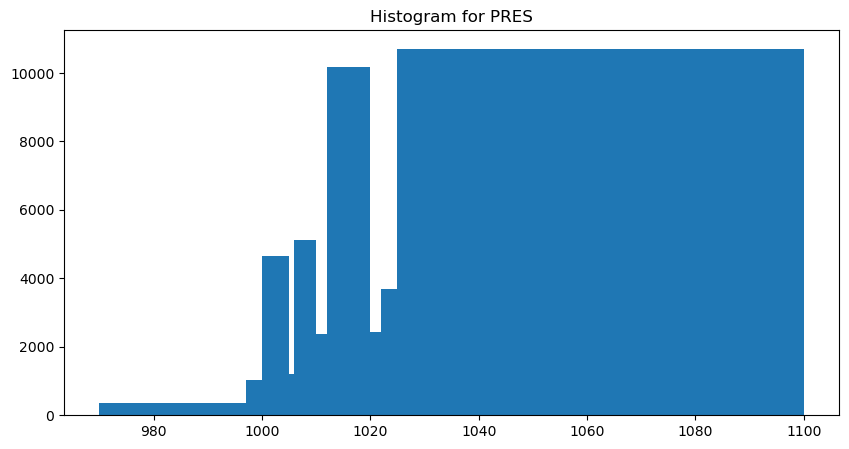

In [151]:
plt.figure(figsize=(10, 5))
plt.title(f'Histogram for PRES')
plt.hist(data[:,8], bins=[970, 997, 1000, 1005, 1006, 1010, 1012, 1020, 1022, 1025, 1100])
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\envs\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


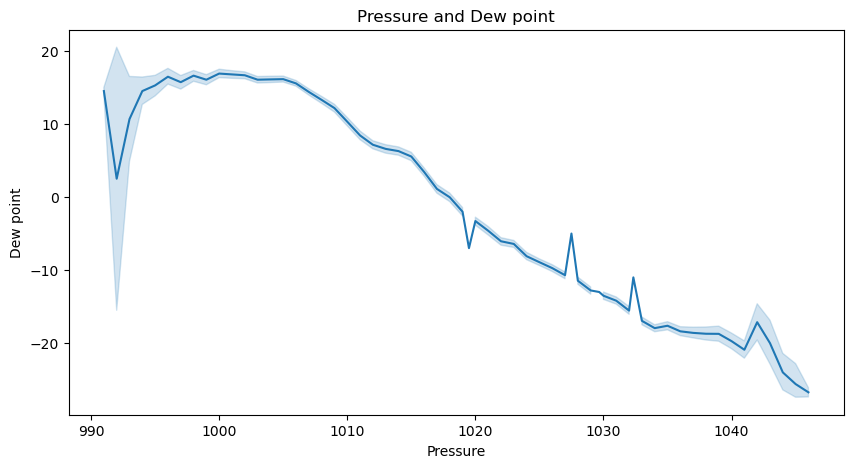

In [152]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data[:,8], y=data[:,6])
plt.title('Pressure and Dew point')
plt.xlabel('Pressure')
plt.ylabel('Dew point')
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [153]:
pearsonn = stats.pearsonr(data[:,8], data[:,6]).statistic
spearmann = stats.spearmanr(data[:,8], data[:,6]).statistic
print(f"Коефіцієнт Пірсона: {pearsonn}, Спірмена: {spearmann}")


Коефіцієнт Пірсона: -0.7777221206444005, Спірмена: -0.784039062659944


6. Провести One Hot Encoding категоріального string атрибуту.

In [154]:
start_time = timeit.default_timer()
data_copy = data.copy()
encn = OneHotEncoder()
encodedn = encn.fit_transform(data_copy[:,9].reshape(-1, 1)).toarray()
columnsn = encn.categories_[0]
for i, col in enumerate(columnsn):
    data_copy = np.append(data_copy, encodedn[:, [i]], axis=1)
end_time = timeit.default_timer()
total_4 = end_time - start_time
print(f"Час виконання: {end_time - start_time} секунд")
data_to_print = np.hstack([data_copy[:,[9]], data_copy[:,13:]])[:]
print(np.insert(columnsn, 0, "cbwd"))
print(np.concatenate((data_to_print[:5], data_to_print[-5:])))

Час виконання: 0.04409770000347635 секунд
['cbwd' 'NE' 'NW' 'SE' 'cv']
[['SE' 0.0 0.0 1.0 0.0]
 ['SE' 0.0 0.0 1.0 0.0]
 ['SE' 0.0 0.0 1.0 0.0]
 ['SE' 0.0 0.0 1.0 0.0]
 ['SE' 0.0 0.0 1.0 0.0]
 ['NW' 0.0 1.0 0.0 0.0]
 ['NW' 0.0 1.0 0.0 0.0]
 ['NW' 0.0 1.0 0.0 0.0]
 ['NW' 0.0 1.0 0.0 0.0]
 ['NW' 0.0 1.0 0.0 0.0]]


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

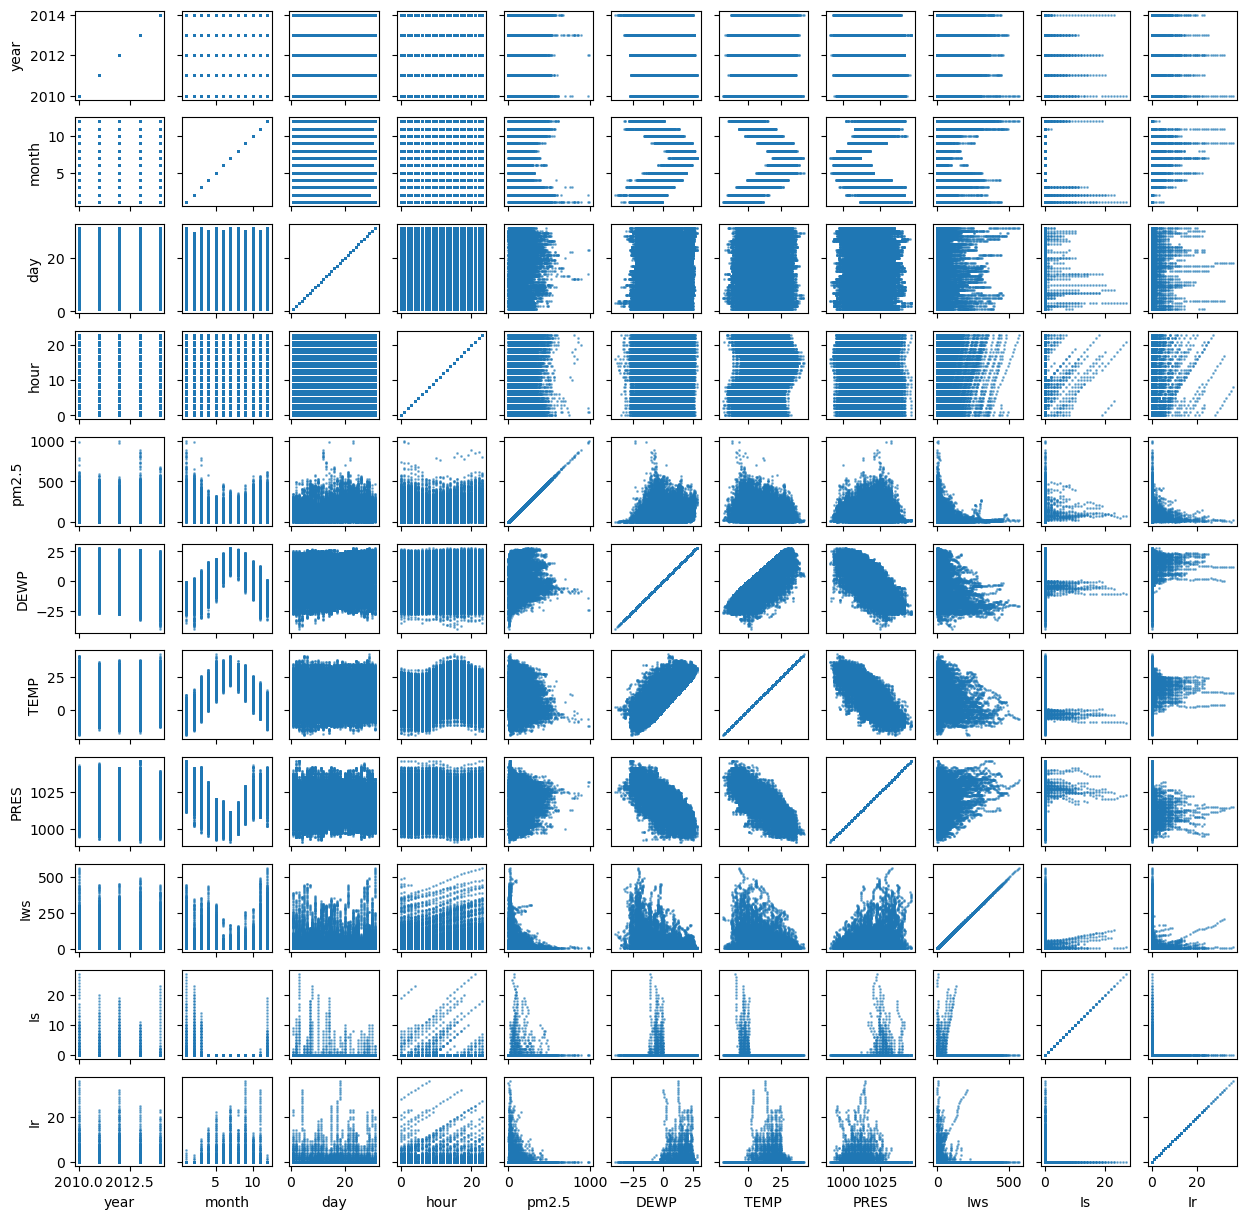

In [155]:
data_for_plot = data.copy()
data_for_plot = np.hstack([data_for_plot[:,1:9], data_for_plot[:,10:]])
columns_for_plot = data_for_plot.shape[1]
columns_names = ["year", "month", "day", "hour", "pm2.5", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
fig, axs = plt.subplots(columns_for_plot, columns_for_plot, figsize=(15, 15))
for i in range(columns_for_plot):
    for j in range(columns_for_plot):
        axs[i, j].scatter(data_for_plot[:, j], data_for_plot[:, i], alpha=0.5, s=1)
        if i < columns_for_plot - 1:
            axs[i, j].set_xticklabels([])
        if j > 0:
            axs[i, j].set_yticklabels([])
        if i == 10:
            axs[i, j].set_xlabel(columns_names[j])
        if j == 0:
            axs[i, j].set_ylabel(columns_names[i])
plt.show()